In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import sys
import pathlib
import os
sys.path.append(str(pathlib.Path(os.path.abspath('')).resolve().parent))
from _9_Mechanics.Spiral import Spiral


In [12]:
R = 0.05
SP0 = Spiral(alp=0e-4, l=0.6*np.pi*2, r=0.8, eta=np.array([-0.00141421356, -0.00141421356]), R=0.052)


In [13]:
def plot_2d_mesh(x, y, xl='', yl=''):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(x, y)
    ax.set_aspect('equal', adjustable='box')

    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    plt.gca().add_collection(LineCollection(segs1))
    plt.gca().add_collection(LineCollection(segs2))
    plt.xlabel(xl)
    plt.ylabel(yl)
    return fig


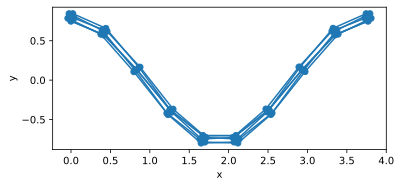

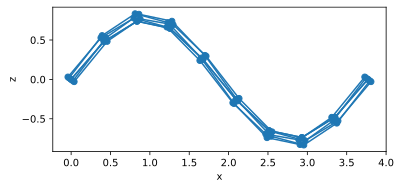

In [14]:
th = np.deg2rad(np.linspace(0, 360, int(1e1)))
alp = np.deg2rad(np.linspace(0, 360, int(6)))

xyz = SP0.get_mesh(th, alp)


fig = plot_2d_mesh(xyz[:,:,0], xyz[:,:,1], 'x', 'y')
fig = plot_2d_mesh(xyz[:,:,0], xyz[:,:,2], 'x', 'z')
plt.show()


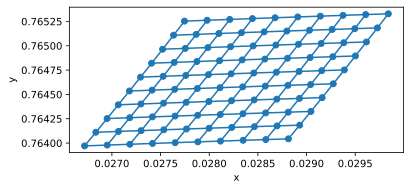

In [15]:
th = np.deg2rad(np.linspace(-0.10, 0.10, int(1e1)))
alp = np.deg2rad(np.linspace(44, 46, int(1e1)))

xyz = SP0.get_mesh(th, alp)

fig = plot_2d_mesh(xyz[:,:,0], xyz[:,:,1], 'x', 'y')
plt.show()

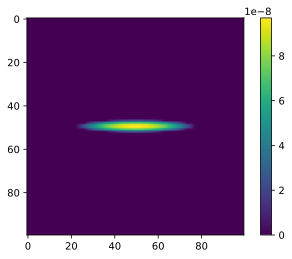

In [29]:
th = np.deg2rad(np.linspace(-0.10, 0.10, int(1e2)))
alp = np.deg2rad(np.linspace(44, 46, int(1e2)))

xyz = SP0.get_mesh(th, alp)

x_ball = SP0.to_xyz(np.array([0., 0., 0.]))
R_ball = R + 1e-7

Disp_xyz = x_ball - xyz
Disp = R_ball - np.sqrt(Disp_xyz[:,:,0]**2 + Disp_xyz[:,:,1]**2 + Disp_xyz[:,:,2]**2)
Disp[Disp<0.0] = 0.0

plt.imshow(Disp)#, extent=np.rad2deg([th[0], th[-1], alp[0], alp[-1]]))
plt.colorbar()
plt.show()

